In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn


In [4]:
pip install ucimlrepo

^C
Note: you may need to restart the kernel to use updated packages.


  Using cached ucimlrepo-0.0.7-py3-none-any.whl.metadata (5.5 kB)
Using cached ucimlrepo-0.0.7-py3-none-any.whl (8.0 kB)


In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features 
y = spambase.data.targets 
  
# metadata 
print(spambase.metadata) 
  
# variable information 
print(spambase.variables) 


{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

Class
0        0.605955
1        0.394045
Name: proportion, dtype: float64


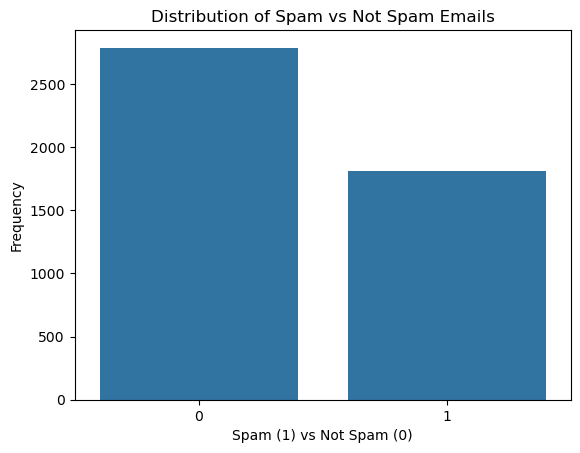

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Quick look at the target distribution
print(y.value_counts(normalize=True))

sns.countplot(x=y.iloc[:, 0])  # y is a DataFrame, use .iloc[:, 0]
plt.title("Distribution of Spam vs Not Spam Emails")
plt.xlabel("Spam (1) vs Not Spam (0)")
plt.ylabel("Frequency")
plt.show()


Estimated spam probability (p): 0.39


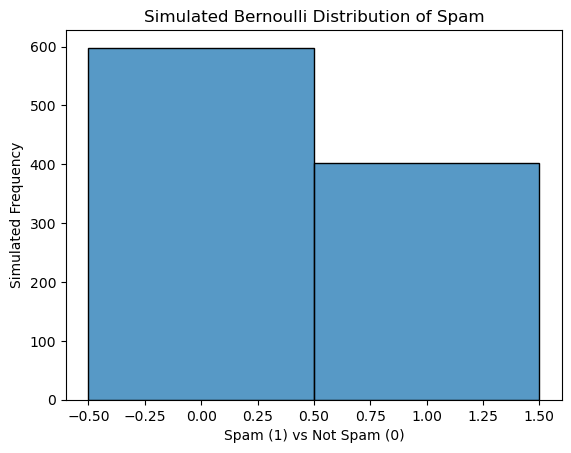

In [ ]:
# Fit  a bernoulli distribution
from scipy.stats import bernoulli

# Estimate probability of spam
p_spam = y.iloc[:, 0].mean() 
print(f"Estimated spam probability (p): {p_spam:.2f}")

# Simulate using Bernoulli
simulated = bernoulli.rvs(p_spam, size=1000)

sns.histplot(simulated, bins=2, discrete=True)
plt.title("Simulated Bernoulli Distribution of Spam")
plt.xlabel("Spam (1) vs Not Spam (0)")
plt.ylabel("Simulated Frequency")
plt.show()


In [5]:
# Train the mode
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from scipy.stats import bernoulli
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [7]:
#Load dataset from UCI Machine Learning Repository
spambase = fetch_ucirepo(id=94)
X = spambase.data.features
y = spambase.data.targets

In [8]:
# Step 2: Explore Target Distribution
y_flat = y.values.ravel()  # Flatten to 1D array
p_spam = y_flat.mean()
print(f"Estimated spam probability (p): {p_spam:.2f}")

Estimated spam probability (p): 0.39


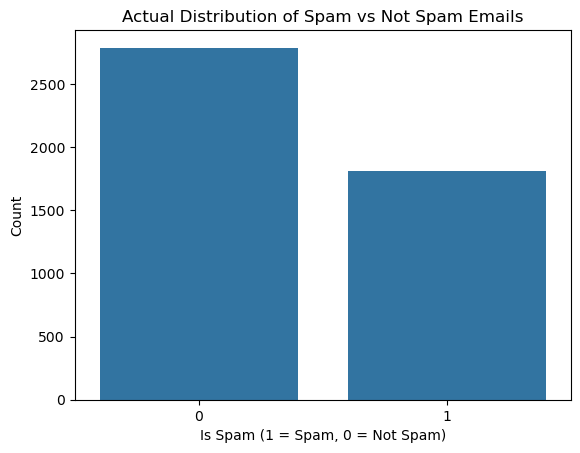

In [9]:
#Plot Actual Distribution
sns.countplot(x=y_flat)
plt.title("Actual Distribution of Spam vs Not Spam Emails")
plt.xlabel("Is Spam (1 = Spam, 0 = Not Spam)")
plt.ylabel("Count")
plt.show()

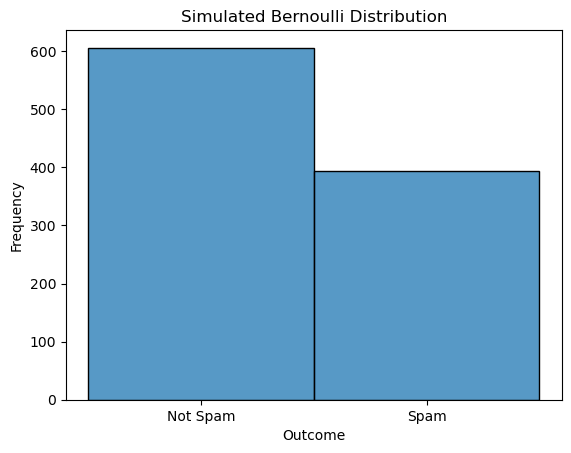

In [10]:
# Step 4: Simulate Bernoulli Distribution
simulated = bernoulli.rvs(p_spam, size=1000)

sns.histplot(simulated, bins=2, discrete=True)
plt.title("Simulated Bernoulli Distribution")
plt.xlabel("Outcome")
plt.ylabel("Frequency")
plt.xticks([0, 1], ['Not Spam', 'Spam'])
plt.show()

In [11]:
# Step 5: Train a Logistic Regression Model
X_train, X_test, y_train, y_test = train_test_split(X, y_flat, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 6: Evaluate Model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       531
           1       0.93      0.88      0.91       390

    accuracy                           0.92       921
   macro avg       0.92      0.92      0.92       921
weighted avg       0.92      0.92      0.92       921



c:\Users\taran\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
